## FT084 - Introdução a Mineração de Dados
---
### Tarefa 04: Regressão Múltipla  

Este código tem por objetivo a resolução de uma das etapas da tarefa em questão, que consiste na implementação de um algoritmo de regressão múltipla, analisando algumas medidas e selecionando os melhores atributos.  
Instruções para o experimento:
1. Encontrar o melhor conjunto de atributos. Qual é o melhor modelo de acordo com as medidas Cp, BIC, and R2 ajustado? Mostre gráficos para dar suporte a sua resposta e mostre os coeficientes do melhor modelo.
2. Repita o procedimento em (1), usando seleção progressiva e seleção regressiva. Como sua resposta agora se compara aos resultados do item (a)?
3. Realize a seleção de variáveis e de modelos usando validação cruzada no conjunto de treino.
4. Compare os modelos obtidos nos items (1), (2) e (3) no conjunto de teste. Qual deles é o melhor?

---

#### 1) Importação das bibliotecas  
Serão utilizados alguns pacotes para a implementação do código. São eles:
- pandas: leitura dos arquivos
- numpy, scipy: cálculo de algumas estatísticas
- sklearn: modelo de regressão, separação dos dados entre treino e teste, transformação dos atributos categóricos para numéricos (caso necessário), matriz de confusão, avaliação do erro, validação cruzada, seleção de atributos
- statsmodels: modelo de regressão
- matplotly.pyplot e plotly: visualizações extras

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import time
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### 2) Criação do dataset
Será gerado um objeto do tipo dataframe com a base de dados boston.

In [2]:
X, y = load_boston(return_X_y=True)
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.DataFrame(X, columns = columns[0:13]).astype('float64')
target = pd.DataFrame(y, columns = ['MEDV']).astype('float64')
target = target['MEDV']
dataset = pd.merge(data, target, left_index = True, right_index = True)

#### 3) Separação dos Dados
Aqui, os dados serão separados em treinamento e teste. O parâmetro *test_size* será definido primeiramente como 0.197 (19,7%) de acordo com o enunciado da tarefa.

In [49]:
# Divisão da base de dados entre treinamento e teste. Random_state = 0 para sempre obter a mesma divisão da base quando o código for executado.
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.197, random_state = 0)

#### 4) Escolha do total de atributos
Será escrito um processo para, de forma iterativa, ir aumentando o número de atributos de 1 em 1 para analisar algumas métricas de cada modelo.

In [51]:
def processSubset(feature_set):
    # Criar um modelo para cada número de feature_set e encontrar o RSS
    model = sm.OLS(y_train,x_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(x_train[list(feature_set)]) - y_train) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [5]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(x_train.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [6]:
# Could take quite awhile to complete...

models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,13):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 13 models on 1 predictors in 0.0661153793334961 seconds.
Processed 78 models on 2 predictors in 0.1356372833251953 seconds.
Processed 286 models on 3 predictors in 0.48122668266296387 seconds.
Processed 715 models on 4 predictors in 1.3880362510681152 seconds.
Processed 1287 models on 5 predictors in 2.568101644515991 seconds.
Processed 1716 models on 6 predictors in 3.3983349800109863 seconds.
Processed 1716 models on 7 predictors in 3.55301833152771 seconds.
Processed 1287 models on 8 predictors in 2.8584444522857666 seconds.
Processed 715 models on 9 predictors in 1.5080187320709229 seconds.
Processed 286 models on 10 predictors in 0.691713809967041 seconds.
Processed 78 models on 11 predictors in 0.16406631469726562 seconds.
Processed 13 models on 12 predictors in 0.029920101165771484 seconds.
Total elapsed time: 16.925914764404297 seconds.


In [7]:
models_best

,RSS,model
1,23737.409689,<statsmodels.regression.linear_model.Regressio...
2,11635.018427,<statsmodels.regression.linear_model.Regressio...
3,10352.747295,<statsmodels.regression.linear_model.Regressio...
4,9624.978604,<statsmodels.regression.linear_model.Regressio...
5,9414.383858,<statsmodels.regression.linear_model.Regressio...
6,9249.437130,<statsmodels.regression.linear_model.Regressio...
7,9121.047537,<statsmodels.regression.linear_model.Regressio...
8,8951.648562,<statsmodels.regression.linear_model.Regressio...
9,8849.363350,<statsmodels.regression.linear_model.Regressio...
10,8779.646488,<statsmodels.regression.linear_model.Regressio...


In [8]:
print(models_best.loc[12, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              865.9
Date:                Wed, 12 May 2021   Prob (F-statistic):                   1.62e-273
Time:                        21:29:53   Log-Likelihood:                         -1194.7
No. Observations:                 404   AIC:                                      2413.
Df Residuals:                     392   BIC:                                      2461.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [9]:
print(getBest(12)["model"].summary())

Processed 13 models on 12 predictors in 0.02991938591003418 seconds.
                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              865.9
Date:                Wed, 12 May 2021   Prob (F-statistic):                   1.62e-273
Time:                        21:29:53   Log-Likelihood:                         -1194.7
No. Observations:                 404   AIC:                                      2413.
Df Residuals:                     392   BIC:                                      2461.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>

Text(0, 0.5, 'BIC')

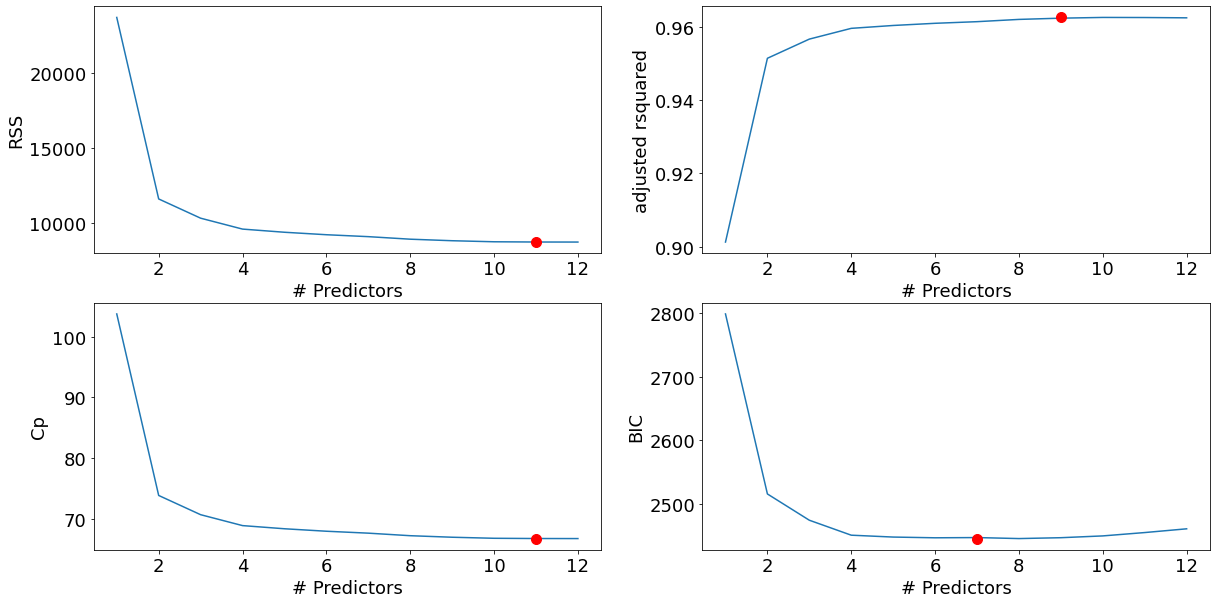

In [10]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

# Set up a 2x2 grid so we can look at 4 plots at once
plt.subplot(2, 2, 1)

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
plt.plot(models_best["RSS"])
plt.plot(models_best["RSS"].argmin(), models_best["RSS"].min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('RSS')

# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The argmax() function can be used to identify the location of the maximum point of a vector
rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

plt.subplot(2, 2, 2)
plt.plot(rsquared_adj)
plt.plot(rsquared_adj.argmax(), rsquared_adj.max(), "or")
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

# We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
aic = models_best.apply(lambda row: row[1].aic, axis=1)
m = len(y_train)
p = 12
hat_sigma_squared = (1/(m - p -1)) * min(models_best["RSS"])
cp = (1/m) * (models_best["RSS"] + 2 * 406 * hat_sigma_squared )

plt.subplot(2, 2, 3)
plt.plot(cp)
plt.plot(cp.argmin(), cp.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('Cp')

bic = models_best.apply(lambda row: row[1].bic, axis=1)

plt.subplot(2, 2, 4)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), "or")
plt.xlabel('# Predictors')
plt.ylabel('BIC')

In [11]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in x_train.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [12]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(x_train.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  13 models on 1 predictors in 0.02291417121887207 seconds.
Processed  12 models on 2 predictors in 0.019946575164794922 seconds.
Processed  11 models on 3 predictors in 0.019946813583374023 seconds.
Processed  10 models on 4 predictors in 0.01795220375061035 seconds.
Processed  9 models on 5 predictors in 0.015957355499267578 seconds.
Processed  8 models on 6 predictors in 0.014960527420043945 seconds.
Processed  7 models on 7 predictors in 0.013963460922241211 seconds.
Processed  6 models on 8 predictors in 0.012965202331542969 seconds.
Processed  5 models on 9 predictors in 0.010970354080200195 seconds.
Processed  4 models on 10 predictors in 0.008975982666015625 seconds.
Processed  3 models on 11 predictors in 0.007978677749633789 seconds.
Processed  2 models on 12 predictors in 0.0059833526611328125 seconds.
Processed  1 models on 13 predictors in 0.003989696502685547 seconds.
Total elapsed time: 0.20742034912109375 seconds.


In [14]:
def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [15]:
models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(x_train.columns)))

tic = time.time()
predictors = x_train.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  13 models on 12 predictors in 0.02991962432861328 seconds.
Processed  12 models on 11 predictors in 0.025931119918823242 seconds.
Processed  11 models on 10 predictors in 0.023935794830322266 seconds.
Processed  10 models on 9 predictors in 0.021941661834716797 seconds.
Processed  9 models on 8 predictors in 0.018949270248413086 seconds.
Processed  8 models on 7 predictors in 0.015957355499267578 seconds.
Processed  7 models on 6 predictors in 0.014959573745727539 seconds.
Processed  6 models on 5 predictors in 0.011967658996582031 seconds.
Processed  5 models on 4 predictors in 0.013964176177978516 seconds.
Processed  4 models on 3 predictors in 0.016953706741333008 seconds.
Processed  3 models on 2 predictors in 0.009973764419555664 seconds.
Processed  2 models on 1 predictors in 0.005984306335449219 seconds.
Total elapsed time: 0.21741914749145508 seconds.


In [16]:
print("------------")
print("Best Subset:")
print("------------")
print(models_best.loc[7, "model"].params)

------------
Best Subset:
------------
CRIM      -0.123773
ZN         0.039741
RM         5.894118
DIS       -0.640327
PTRATIO   -0.656663
B          0.014707
LSTAT     -0.422842
dtype: float64


In [17]:
print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[7, "model"].params)

-----------------
Foward Selection:
-----------------
RM         6.024852
LSTAT     -0.420710
PTRATIO   -0.742914
B          0.013960
CHAS       2.542632
CRIM      -0.105986
DIS       -0.310928
dtype: float64


In [18]:
print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[7, "model"].params)

-------------------
Backward Selection:
-------------------
CRIM      -0.123773
ZN         0.039741
RM         5.894118
DIS       -0.640327
PTRATIO   -0.656663
B          0.014707
LSTAT     -0.422842
dtype: float64


In [19]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [20]:
selector = RFECV(model, step=1, cv=12)
selector = selector.fit(x_train,y_train)
selector.support_

array([ True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True])

In [21]:
cv_results = cross_validate(model, x_train, y_train, return_estimator = True)
cv_results

{'fit_time': array([0.00299144, 0.00299144, 0.00199485, 0.00199389, 0.00199437]),
 'score_time': array([0.00199556, 0.00199461, 0.00199509, 0.00199437, 0.00099826]),
 'estimator': (LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression(),
  LinearRegression()),
 'test_score': array([0.77420159, 0.69734273, 0.76837537, 0.6879199 , 0.81554642])}